In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing seaborn library
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Table 1.1


In [3]:
# Loading the companies csv file into companies data frame

companies = pd.read_csv("companies.csv", encoding= 'unicode_escape')

In [4]:
# Loading the rounds2 csv file into rounds2 data frame

rounds2 = pd.read_csv("rounds2.csv", encoding= 'unicode_escape')

In [5]:
# Finding uniques values for company_permalink in rounds2 dataframe 

rounds2.company_permalink.describe()

count                       114949
unique                       90247
top       /ORGANIZATION/SOLARFLARE
freq                            10
Name: company_permalink, dtype: object

In [6]:
rounds2.shape

(114949, 6)

In [7]:
# Finding uniques values for permalink in companies dataframe 

companies.permalink.describe()

count                         66368
unique                        66368
top       /Organization/Mouth-Foods
freq                              1
Name: permalink, dtype: object

In [8]:
companies.shape

(66368, 10)

In [9]:
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [10]:
rounds2.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [11]:
# Refractoring the company_permalink from uppercase to lowercase of rounds2 data set 

rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [12]:
#renaming company_permalink to permalink from rounds2 data set
rounds2 = rounds2.rename(columns={"company_permalink": "permalink"})

In [13]:
# Refractoring the permalink from uppercase to lowercase of companies data set 

companies['permalink'] = companies['permalink'].str.lower()

In [14]:
# Merging rounds2 and companies data frame to form a new data frame named master_frame

master_frame = companies.merge(rounds2, on='permalink')

In [15]:
master_frame.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [16]:
# Observations in master_frame data frame

master_frame.shape

(114942, 15)

In [17]:
# Finding nul summary in the data frame

master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
dtype: int64

In [18]:
# Analysing the statistical details of master_dataframe 
master_frame.describe()

,raised_amount_usd
count,9.495800e+04
mean,1.042696e+07
std,1.148218e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680521e+06
75%,7.000000e+06
max,2.127194e+10


In [19]:
#Fidnging median value for raised_amount_usd

median = master_frame['raised_amount_usd'].median()

In [20]:
#replacing null value with median value for raised_amount_usd column

master_frame['raised_amount_usd'] = master_frame['raised_amount_usd'].fillna(median)

In [21]:
# Rechecking Null summary of mastere_dataframe ata set

master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd              0
dtype: int64

# Table 2.1

In [22]:
# Representative funding amount of venture type

venture = master_frame[master_frame['funding_round_type'] == "venture"]

In [23]:
#Analysing the statistical details of venture funding type 

venture.describe()

,raised_amount_usd
count,5.549300e+04
mean,1.079369e+07
std,8.220648e+07
min,0.000000e+00
25%,1.680521e+06
50%,4.000000e+06
75%,1.050000e+07
max,1.760000e+10


In [24]:
# Representative funding amount of angel type

angel = master_frame[master_frame.funding_round_type == "angel"]

In [25]:
#Analysing the statistical details of angel funding type 

angel.describe()

,raised_amount_usd
count,6.094000e+03
mean,1.104860e+06
std,6.618585e+06
min,0.000000e+00
25%,2.000000e+05
50%,6.000000e+05
75%,1.680521e+06
max,4.945120e+08


In [26]:
# Representative funding amount of seed type

seed = master_frame[master_frame.funding_round_type == "seed"]

In [27]:
#Analysing the statistical details of angel funding type 

seed.describe()

,raised_amount_usd
count,3.051800e+04
mean,9.375032e+05
std,1.994831e+06
min,0.000000e+00
25%,1.000000e+05
50%,5.745865e+05
75%,1.680521e+06
max,2.000000e+08


In [28]:
# Representative funding amount of private equity type

private_equity = master_frame[master_frame.funding_round_type == "private_equity"]


In [29]:
#Analysing the statistical details of angel funding type 

private_equity.describe()

,raised_amount_usd
count,2.285000e+03
mean,6.236846e+07
std,1.841626e+08
min,0.000000e+00
25%,1.680521e+06
50%,1.212201e+07
75%,6.240000e+07
max,4.745460e+09


In [30]:
master_frame1 = master_frame.loc[(master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]

In [31]:
# Most suitable Investment Type between 5 to 15 million USD

master_frame = master_frame.loc[(master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000) & (master_frame['funding_round_type'] == 'private_equity')]

# Table 3.1


In [32]:
# Creating data frame named top9 with the top nine countries ( based on the total investment amount each country has received )

top9 = master_frame.pivot_table(values='raised_amount_usd', index='country_code', aggfunc = 'sum')
top9.sort_values(by='raised_amount_usd', inplace=True, ascending=False)

In [33]:
top9 = top9.nlargest(9, "raised_amount_usd") 
top9

,raised_amount_usd
country_code,
USA,2.907645e+09
GBR,1.538020e+08
CAN,1.190442e+08
ISR,1.084792e+08
AUS,4.791792e+07
BRA,4.425664e+07
IND,4.200000e+07
NLD,4.025000e+07
SWE,3.831906e+07


# Table 5.1

In [34]:
# Removing null value from "category_list"
master_frame = master_frame[-master_frame.category_list.isnull()]

In [35]:
# Extract the primary sector of each category list

def remove_pipe(str):
    return str.rsplit('|',5)[0]

master_frame['primary_sector'] = master_frame['category_list'].apply(remove_pipe)

In [36]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
21,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,Internet Marketing|Media|Public Relations,operating,USA,NY,New York City,New York,24-10-2013,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,NaN,01-02-2015,6000000.0,Internet Marketing
659,/organization/4tech,4Tech,NaN,Biotechnology,operating,USA,MA,Boston,Waltham,01-01-2011,/funding-round/11cde5481e86cf43d357448a4abbdd67,private_equity,NaN,21-12-2011,7000000.0,Biotechnology
1605,/organization/accumetrics,Accumetrics,http://www.accumetrics.com,Biotechnology,acquired,USA,CA,San Diego,San Diego,01-01-1996,/funding-round/3f65c3c3e8355c4b9121ccfb7c1b3107,private_equity,NaN,30-08-2013,6000001.0,Biotechnology
1656,/organization/ace-comm,ACE*COMM,http://www.acecomm.com,Public Relations,operating,USA,MD,"Washington, D.C.",Gaithersburg,01-01-1983,/funding-round/1ca42fba76f93d2f70476e76ed5727a2,private_equity,NaN,01-01-2007,5000000.0,Public Relations
1676,/organization/acelrx-pharmaceuticals,AcelRx Pharmaceuticals,http://www.acelrx.com,Biotechnology|Health Care,ipo,USA,CA,SF Bay Area,Redwood City,NaN,/funding-round/9d2e7e5caa0afcef3f31d0c9da40f187,private_equity,NaN,07-06-2012,10000002.0,Biotechnology


In [37]:
# Loading the mapping csv file into mapping data frame

mapping = pd.read_csv("mapping.csv", encoding= 'unicode_escape')

In [38]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [39]:
# Dropping NA column

mapping = mapping.dropna(how='any',axis=0) 

In [40]:
# Usinng Pandas.melt function to take out important information

mapping = pd.melt(mapping, id_vars=['category_list'], value_vars=['Automotive & Sports', 'Cleantech / Semiconductors','Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'])

In [41]:
# Merging mapping dataframe to master_frame

df = master_frame.merge(mapping,on = 'category_list')

In [42]:
df_fil = df[df['value'] == 1] 

In [43]:
# Renaming column name from variable to main_sector

df_fil = df_fil.rename(columns={"variable": "main_sector"})

In [44]:
# Filtering data from 5 milloin to 15 million USD investment

df_FT = df_fil.loc[(df_fil['raised_amount_usd'] >= 5000000) & (df_fil['raised_amount_usd'] <= 15000000)]

In [45]:
# Creating data frame with FT venture, Country USA, investments range of 5-15 M USD

D1 = df_FT.loc[df_FT['country_code'] == "USA"]

In [46]:
# Creating data frame with FT venture, Country USA, investments range of 5-15 M USD

D2 = df_FT.loc[df_FT['country_code'] == "GBR"]

In [47]:
# Creating data frame with FT venture, Country USA, investments range of 5-15 M USD

D3 = df_FT.loc[df_FT['country_code'] == "CAN"]

In [48]:
# Total number of investments in USA

D1.describe()

,raised_amount_usd,value
count,1.790000e+02,179.0
mean,9.539103e+06,1.0
std,3.238453e+06,0.0
min,5.000000e+06,1.0
25%,6.500000e+06,1.0
50%,9.999951e+06,1.0
75%,1.209000e+07,1.0
max,1.500000e+07,1.0


In [49]:
D3.raised_amount_usd.sum()

94726044.0

In [50]:
D3.shape

(11, 18)

In [51]:
# Total number of investments in GBR

D2.describe()

,raised_amount_usd,value
count,9.000000e+00,9.0
mean,1.099439e+07,1.0
std,3.276102e+06,0.0
min,5.568600e+06,1.0
25%,1.000000e+07,1.0
50%,1.200000e+07,1.0
75%,1.318269e+07,1.0
max,1.500000e+07,1.0


In [52]:
# Total number of investments in CAN

D3.describe()

,raised_amount_usd,value
count,1.100000e+01,11.0
mean,8.611459e+06,1.0
std,2.818406e+06,0.0
min,5.000000e+06,1.0
25%,6.850000e+06,1.0
50%,8.000000e+06,1.0
75%,1.012500e+07,1.0
max,1.470000e+07,1.0


In [53]:
# Total amount in USD in USA

D1.raised_amount_usd.sum()

1707499464.0

In [54]:
# Total amount in USD in GBR

D2.raised_amount_usd.sum()

98949554.0

In [55]:
# Total amount in USD in CAN

D3.raised_amount_usd.sum()

94726044.0

In [56]:
# Top sector (based on count of investments) for USA

top_sector_count_usa = D1.pivot_table(values = ['raised_amount_usd'], index = ['main_sector'], aggfunc = 'count')
top_sector_count_usa.sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
main_sector,
Cleantech / Semiconductors,70
Others,45
Health,28
"News, Search and Messaging",15
Manufacturing,9
"Social, Finance, Analytics, Advertising",6
Entertainment,5
Automotive & Sports,1


In [57]:
# Top sector (based on count of investments) for GBR

top_sector_count_gbr=D2.pivot_table(values = ['raised_amount_usd'], index = ['main_sector'], aggfunc = 'count')
top_sector_count_gbr.sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
main_sector,
Others,2
"Social, Finance, Analytics, Advertising",2
Automotive & Sports,1
Cleantech / Semiconductors,1
Entertainment,1
Manufacturing,1
"News, Search and Messaging",1


In [58]:
# Top sector (based on count of investments) for CAN

top_sector_count_can = D3.pivot_table(values = ['raised_amount_usd'], index = ['main_sector'], aggfunc = 'count')
top_sector_count_can.sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
main_sector,
Cleantech / Semiconductors,7
Manufacturing,2
Entertainment,1
Others,1


In [59]:
# highest investment for sector 'Cleantech / Semiconductors' in USA

highest_investment_company_usa = D1.loc[D1['main_sector'] == "Cleantech / Semiconductors"]
highest_investment_company_usa.sort_values(by='raised_amount_usd', ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value
929,/organization/sungevity,Sungevity,http://www.sungevity.com,Clean Technology,operating,USA,CA,SF Bay Area,Oakland,01-01-2008,/funding-round/ca3fea448fe8a135c2cf17f85a1632fb,private_equity,NaN,03-07-2013,15000000.0,Clean Technology,Cleantech / Semiconductors,1
993,/organization/soft-machines,Soft Machines,http://smachines.com,Semiconductors,operating,USA,CA,SF Bay Area,Santa Clara,01-01-2006,/funding-round/128e56d3e084cbce2f81ba741911e7bf,private_equity,NaN,13-02-2012,15000000.0,Semiconductors,Cleantech / Semiconductors,1
521,/organization/wafergen-biosystems,WaferGen Biosystems,http://www.wafergen.com,Biotechnology,ipo,USA,CA,SF Bay Area,Fremont,NaN,/funding-round/9f4304af6a945d4d3b0d1cdcf2a3cf56,private_equity,NaN,27-08-2013,15000000.0,Biotechnology,Cleantech / Semiconductors,1
945,/organization/alien-technology,Alien Technology,http://www.alientechnology.com,Semiconductors,operating,USA,CA,SF Bay Area,San Jose,01-01-1994,/funding-round/818c2dcd24e5155075d0a848704b3149,private_equity,NaN,08-11-2011,15000000.0,Semiconductors,Cleantech / Semiconductors,1
73,/organization/arcadia-biosciences,Arcadia Biosciences,http://arcadiabio.com,Biotechnology,ipo,USA,CA,Sacramento,Davis,01-01-2002,/funding-round/5ee3442847053609598282f5f09dcb0b,private_equity,NaN,31-10-2008,15000000.0,Biotechnology,Cleantech / Semiconductors,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,/organization/algae-international-group,Algae International Group,http://algaeplanet.com,Clean Technology,operating,USA,TX,Dallas,Addison,01-01-2008,/funding-round/fa8f55fb48f3f8fdd6274f02a0e8d3ef,private_equity,NaN,23-07-2013,5000000.0,Clean Technology,Cleantech / Semiconductors,1
177,/organization/genspera,GenSpera,http://www.genspera.com,Biotechnology,operating,USA,TX,San Antonio,San Antonio,01-01-2003,/funding-round/9f570e92c9f1582a570261d8348639a1,private_equity,NaN,19-08-2013,5000000.0,Biotechnology,Cleantech / Semiconductors,1
233,/organization/international-stem-cell-corporation,International Stem Cell Corporation,http://internationalstemcell.com,Biotechnology,operating,USA,CA,San Diego,Carlsbad,01-01-2001,/funding-round/f068f4023aca2ff79352d6628f830fd0,private_equity,NaN,20-03-2012,5000000.0,Biotechnology,Cleantech / Semiconductors,1
185,/organization/gentris,Gentris,http://www.gentris.com/,Biotechnology,acquired,USA,NC,Raleigh,Morrisville,01-01-2001,/funding-round/0bee0041b80adfb54dc13e1e239d6ec7,private_equity,NaN,27-04-2005,5000000.0,Biotechnology,Cleantech / Semiconductors,1


In [60]:
# highest investment for sector 'Others' in GBR

highest_investment_company_gbr = D2.loc[D2['main_sector'] == "Others"]
highest_investment_company_gbr.sort_values(by='raised_amount_usd', ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value
1582,/organization/unii,Unii,http://www.unii.com,Software,operating,GBR,H9,London,London,27-10-2012,/funding-round/dfed2bd08b5fb9d422413a2083ab37f1,private_equity,NaN,28-03-2015,11000000.0,Software,Others,1
1758,/organization/hydro66,Hydro66,http://hydro66.com/,Telecommunications,operating,GBR,H9,London,London,07-05-2014,/funding-round/bff724cafa5fce5d7cbcd5471e172918,private_equity,NaN,14-10-2014,10000000.0,Telecommunications,Others,1


In [61]:
# highest investment for sector 'Cleantech / Semiconductors' in CAN

highest_investment_company_ind = D3.loc[D3['main_sector'] == "Cleantech / Semiconductors"]
highest_investment_company_ind.sort_values(by='raised_amount_usd', ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value
881,/organization/filterboxx-water-environmental,FilterBoxx Water & Environmental,http://www.filterboxx.com,Clean Technology,operating,CAN,AB,Calgary,Calgary,NaN,/funding-round/0e460c343f6a5c61a26548acc02b968c,private_equity,NaN,09-06-2014,14700000.0,Clean Technology,Cleantech / Semiconductors,1
1385,/organization/black-rock-tidal-power,Black Rock Tidal Power,http://www.blackrocktidalpower.com/home/,Energy,operating,CAN,NS,Halifax,Halifax,01-01-2013,/funding-round/d0705644bf475670891d1762092a1e40,private_equity,NaN,25-11-2015,10500000.0,Energy,Cleantech / Semiconductors,1
921,/organization/solar-flow-through,Solar Flow-Through,http://solarflowthrough.com,Clean Technology,operating,CAN,BC,Vancouver,Vancouver,01-01-2012,/funding-round/a81f83f199899fbf54a64914c5499327,private_equity,NaN,10-10-2013,10000000.0,Clean Technology,Cleantech / Semiconductors,1
305,/organization/nono,NONO,http://www.nonoinc.ca,Biotechnology,operating,CAN,ON,Toronto,Toronto,01-01-2003,/funding-round/0df8740bcbbed5e2f8047da557af2b87,private_equity,NaN,24-05-2013,9776044.0,Biotechnology,Cleantech / Semiconductors,1
529,/organization/zenith-epigenetics,Zenith Epigenetics,http://zenithepigenetics.com,Biotechnology,operating,CAN,AB,Calgary,Calgary,NaN,/funding-round/5834a47ec64eabb2ee2d3daaa6dcda99,private_equity,NaN,14-03-2014,8000000.0,Biotechnology,Cleantech / Semiconductors,1
857,/organization/ballard-power-systems,Ballard Power Systems,http://www.ballard.com,Clean Technology,ipo,CAN,BC,Burnaby,Burnaby,01-01-1979,/funding-round/f37e975ea2258e8658bb7bded9edfd8d,private_equity,NaN,09-08-2012,7700000.0,Clean Technology,Cleantech / Semiconductors,1
201,/organization/highland-therapeutics,Highland Therapeutics,http://highlandtherapeutics.com,Biotechnology,operating,CAN,ON,Toronto,Toronto,16-05-2008,/funding-round/8a70bac33e9e113a7baee8b54979b7f0,private_equity,NaN,16-08-2013,6700000.0,Biotechnology,Cleantech / Semiconductors,1


In [62]:
# Second highest investment for sector 'Others' in USA

second_highest_investment_company_usa = D1.loc[D1['main_sector'] == "Others"]
second_highest_investment_company_usa.sort_values(by='raised_amount_usd', ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value
1326,/organization/babyage,Babyage,http://www.babyage.com,E-Commerce,operating,USA,PA,Scranton,Wilkes Barre,01-01-1999,/funding-round/557e52056c0456b64f9a978db8c7ca24,private_equity,NaN,24-03-2010,15000000.0,E-Commerce,Others,1
1606,/organization/bluetarp-financial,BlueTarp Financial,http://www.bluetarp.com,Local Businesses,operating,USA,ME,"Portland, Maine",Portland,01-01-1998,/funding-round/93fec4c0647ae4703c9cca3fbdffba58,private_equity,NaN,23-07-2013,15000000.0,Local Businesses,Others,1
1334,/organization/curacao,Curacao,http://icuracao.com,E-Commerce,operating,USA,CA,Los Angeles,Los Angeles,01-01-1978,/funding-round/5ad6edd298035d73dc7fd5c781f219ea,private_equity,NaN,18-08-2011,15000000.0,E-Commerce,Others,1
1182,/organization/ikasystems,ikaSystems,http://www.ikasystems.com,Enterprise Software,acquired,USA,MA,Boston,Southborough,01-01-1999,/funding-round/b893ad806058dd820ec22847f329a61c,private_equity,NaN,15-01-2014,15000000.0,Enterprise Software,Others,1
1398,/organization/blackboard,Blackboard,http://www.blackboard.com,Software,ipo,USA,DC,"Washington, D.C.",Washington,01-01-1997,/funding-round/c7c16ce0150805fb3c4f5729ce1033fa,private_equity,NaN,08-05-2009,14999515.0,Software,Others,1
622,/organization/unreal-brands,Unreal Brands,http://getunreal.com,Hospitality,operating,USA,MA,Boston,Boston,01-12-2010,/funding-round/06fcfbceb5997933f60810f909098d22,private_equity,NaN,11-02-2013,14000002.0,Hospitality,Others,1
1478,/organization/ngage-labs,nGage Labs,http://www.ngagelabs.com,Software,operating,USA,AZ,Phoenix,Scottsdale,01-01-2011,/funding-round/b22c9585bd6e5ea6ffde8a095f5a7d89,private_equity,NaN,17-06-2013,13976578.0,Software,Others,1
670,/organization/m86-security,M86 Security,http://www.m86security.com,Security,acquired,USA,CA,Anaheim,Orange,01-01-1995,/funding-round/5b6dd78a997ddd04193c352adccd5b68,private_equity,NaN,31-01-2012,13626532.0,Security,Others,1
1566,/organization/tascet,TASCET,http://www.tascet.com,Software,operating,USA,WI,Madison,Madison,01-01-2005,/funding-round/6239635cb7797358d4e1803b0c5331e1,private_equity,NaN,02-08-2012,13205112.0,Software,Others,1
1446,/organization/lumeta,Lumeta Corporation,http://www.lumeta.com,Software,operating,USA,NJ,Newark,Somerset,01-01-2000,/funding-round/7848a3d2c112b56f7ce91fc1b9da2a7f,private_equity,NaN,29-10-2015,13000000.0,Software,Others,1


In [63]:
# Second highest investment for sector 'Social, Finance, Analytics, Advertising' in GBR

second_highest_investment_company_gbr = D2.loc[D2['main_sector'] == "Social, Finance, Analytics, Advertising"]
second_highest_investment_company_gbr.sort_values(by='raised_amount_usd', ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value
1239,/organization/arkex,ARKeX,http://www.arkex.com,Consulting,operating,GBR,C3,London,Cambridge,01-01-2004,/funding-round/45af240b405f71a6df791ba8fc84d8c7,private_equity,NaN,26-06-2013,15000000.0,Consulting,"Social, Finance, Analytics, Advertising",1
1255,/organization/pts-consulting,PTS Consulting,http://ptsconsulting.com,Consulting,operating,GBR,H9,London,London,01-01-1983,/funding-round/9b366acacc6eb0e614d67e3c043a5208,private_equity,NaN,08-10-2013,13182687.0,Consulting,"Social, Finance, Analytics, Advertising",1


In [64]:
# Second highest investment for sector 'Manufacturing' in CAN

second_highest_investment_company_ind = D3.loc[D3['main_sector'] == "Manufacturing"]
second_highest_investment_company_ind.sort_values(by='raised_amount_usd', ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value
572,/organization/leddartech,LeddarTech,http://www.leddartech.com,Hardware + Software,operating,CAN,QC,Quebec City,Quebec,01-01-2007,/funding-round/7b7d4b4245f12bd17bf95f99f254f526,private_equity,NaN,18-11-2014,7000000.0,Hardware + Software,Manufacturing,1
1292,/organization/gogold-resources,GoGold Resources,http://gogoldresources.com,Manufacturing,operating,CAN,NS,Halifax,Halifax,01-01-2010,/funding-round/c85361fbe839700b1d4f100555a93e9d,private_equity,NaN,30-09-2013,5000000.0,Manufacturing,Manufacturing,1


# Plot 1

### A plot showing the representative amount of investment in each funding type. 

In [65]:
plot1 = master_frame1.loc[(master_frame1['funding_round_type'] == "venture") | (master_frame1['funding_round_type'] == "seed") | (master_frame1['funding_round_type'] == "angel") | (master_frame1['funding_round_type'] == "private_equity")]

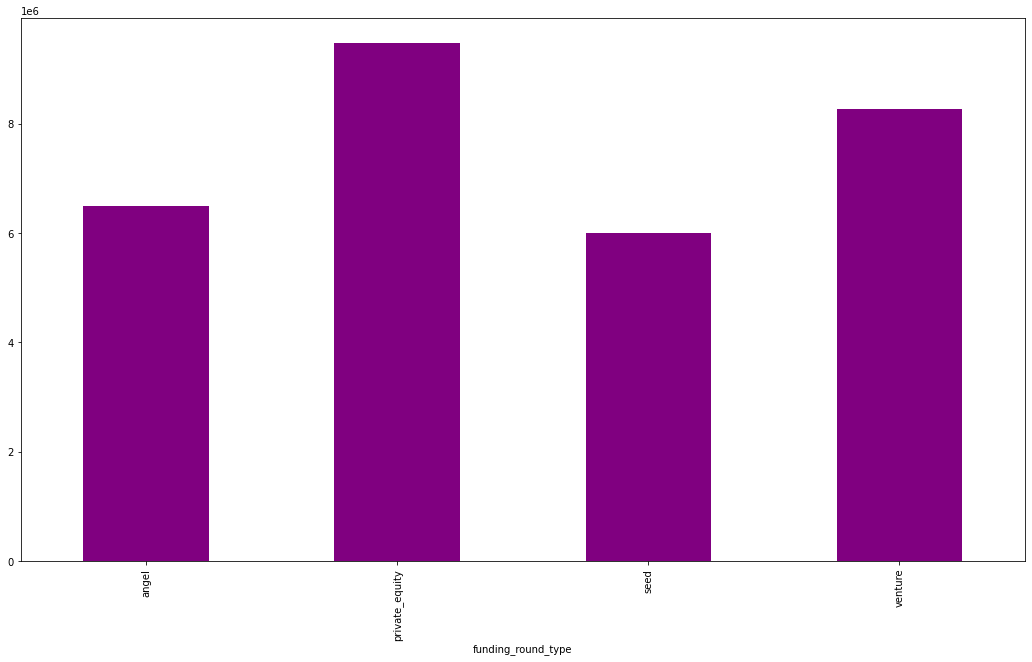

In [66]:
# Most suitable Investment Type between 5 to 15 million USD

plt.figure(figsize=[18,10])
plot1.groupby(['funding_round_type'])['raised_amount_usd'].median().plot.bar(color = "purple")
# plt.bar(repre_value['funding_round_type'], repre_value['raised_amount_usd'] )
plt.show()

# Plot 2 

### A plot showing the top 9 countries against the total amount of investments of funding type FT.

In [67]:
plot2_1 = df_FT.loc[df_FT['funding_round_type'] == "private_equity"]

In [68]:
plot2_2 = df_FT.loc[(plot2_1['country_code'].isin(["USA", 'GBR', "CAN", "CHN", "IND", "ISR","FRA","DEU", "SGP"]))]

In [69]:
top9_9 = pd.pivot_table(plot2_2, values = 'raised_amount_usd' , index = 'country_code',  aggfunc = sum)

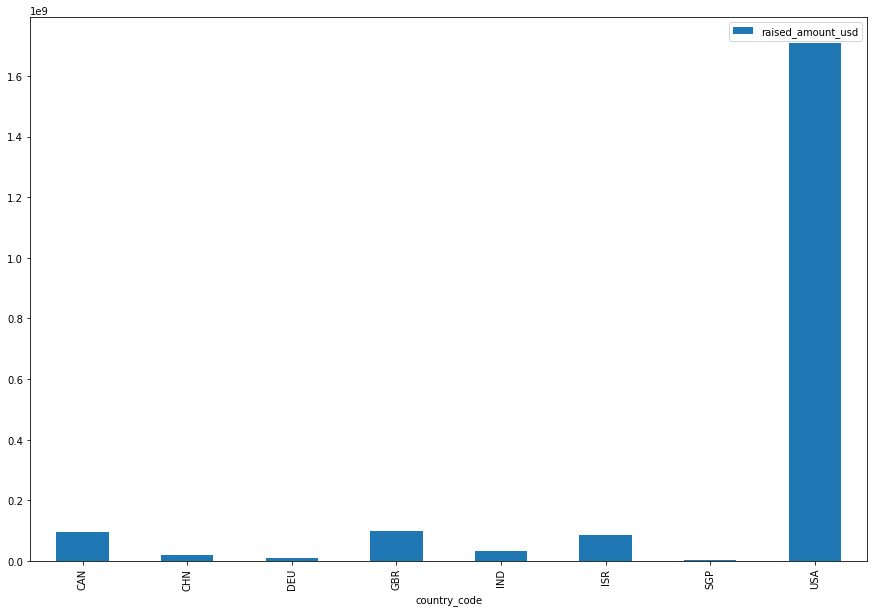

In [70]:
# A plot showing the top 9 countries against the total amount of investments of funding type "Venture".
top9_9.plot(kind = 'bar',  figsize = [15,10])
plt.show()

# Plot 3

### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

In [71]:
plot3 = df_FT.loc[df_FT['funding_round_type'] == "private_equity"]

In [72]:
D6 = df_FT.loc[(df_FT['country_code'].isin(["CAN", 'GBR', "USA"]))]

In [73]:
plot3_investment = pd.pivot_table(D6, values = 'raised_amount_usd' , index = 'country_code', columns = 'main_sector', aggfunc = sum)

In [74]:
plot3_investment_perc = plot3_investment[['Automotive & Sports', 'Cleantech / Semiconductors','Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']].apply(lambda x:x/x.sum(), axis = 1)

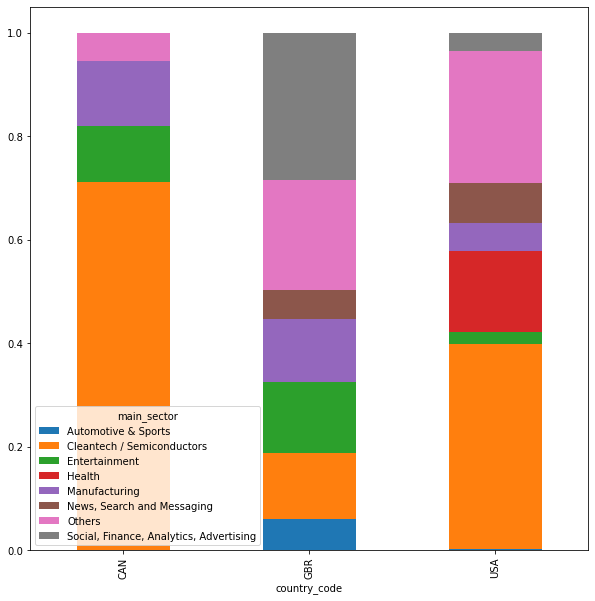

In [75]:
# Plot showing the number of investments in top 3 sectors of top 3 countries on one chart (for the investment type "Venture").

plot3_investment_perc.plot(kind = 'bar', stacked = "True", figsize = [10,10])
plt.show()